In [5]:
%matplotlib inline
import time
import numpy as np
from scipy import optimize
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import os, sys
#from time import sleep, monotonic
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Setup a parameter space

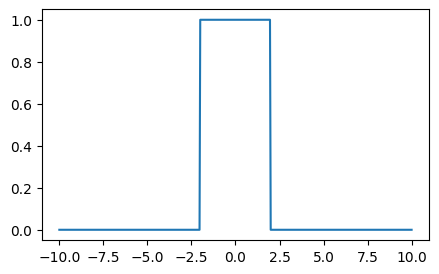

In [6]:
x=np.linspace(-10,10,501) ## prepare the current density 
y=np.zeros(501)
for i in range(501):
    if i>= 200 and i<300:
        y[i]=1
    else:
        y[i]=0
        
plt.figure(figsize=(5, 3))
# plt.subplot(131)
# plt.plot(I[N,:]/1e-6, Keithley[N,:]/1e-3)

plt.plot(x,y)
# plt.xlabel('I ($\mu$A)')
# plt.ylabel('V (mV)')

# Fraunhofer pattern

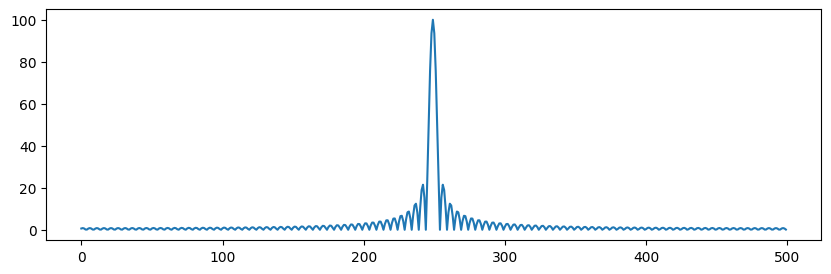

In [7]:
I=np.fft.fft(y)
In=np.zeros(250)
Ip=np.zeros(251)
Ia=np.zeros(501)
In=np.flipud(I[0:250])
Ip=np.flipud(I[251:501])
Ia=np.concatenate([In, Ip])
plt.figure(figsize=(10, 3))
    
plt.plot(np.abs(Ia[0:501]))
# plt.plot(I)

/var/folders/_b/y4_l8xx96yd_n1482vw0pkpc0000gn/T/ipykernel_24680/3516385083.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  Ia2[i]=0.5*Ia[i]
/var/folders/_b/y4_l8xx96yd_n1482vw0pkpc0000gn/T/ipykernel_24680/3516385083.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  Ia2[i]=Ia[i]


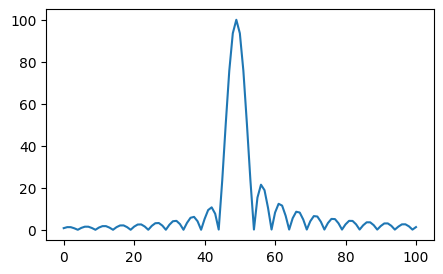

In [8]:
Ia2=np.zeros(500)
for i in range(500):
    if i< 244:
        Ia2[i]=0.5*Ia[i]
    else:
        Ia2[i]=Ia[i]
        
plt.figure(figsize=(5, 3))
    
plt.plot(np.abs(Ia2[200:301]))
# plt.plot(Ia2[200:301])


<IPython.core.display.Javascript object>


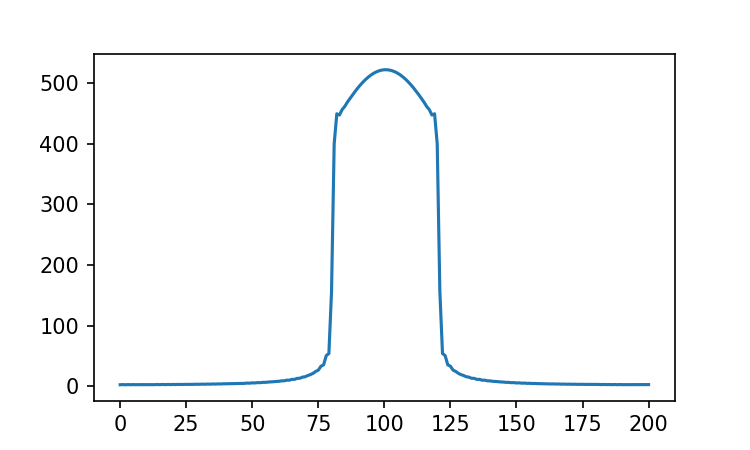

In [5]:
plt.figure(figsize=(5, 3))

I_rev=np.fft.fft(Ia[150:351])

I_rev2=np.fft.fft(Ia2[150:351])

plt.plot(np.abs(I_rev2))
# plt.plot(np.abs(I_rev))

C:\Users\chung\AppData\Local\Temp/ipykernel_36256/2846804346.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  Ia2L[i]=1*Ia[i]
C:\Users\chung\AppData\Local\Temp/ipykernel_36256/2846804346.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  Ia2L[i]=0.5*Ia[i]


<IPython.core.display.Javascript object>


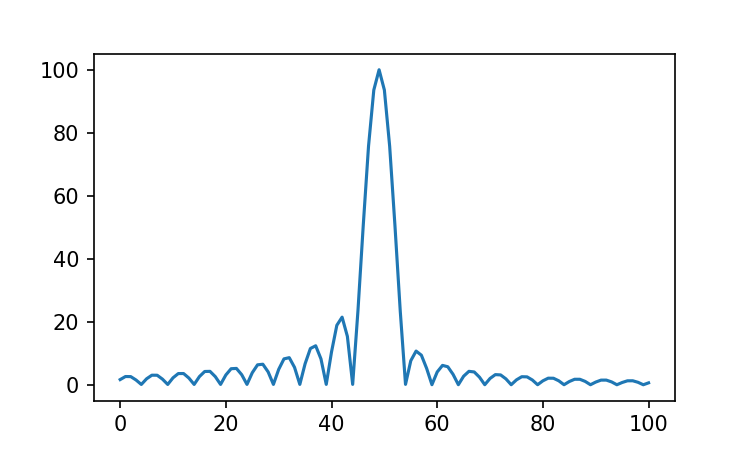

In [9]:
Ia2L=np.zeros(500)
for i in range(500):
    if i< 255:
        Ia2L[i]=1*Ia[i]
    else:
        Ia2L[i]=0.5*Ia[i]
        
plt.figure(figsize=(5, 3))
    
plt.plot(np.abs(Ia2L[200:301]))
# plt.plot(Ia2[200:301])


<IPython.core.display.Javascript object>


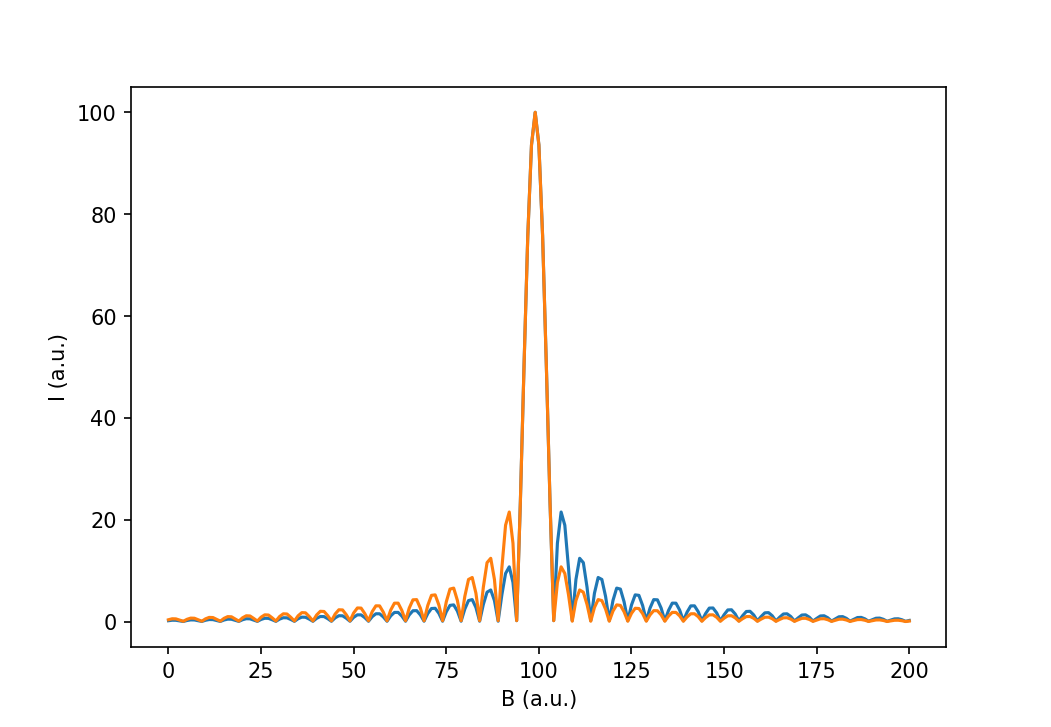

Text(0, 0.5, 'I (a.u.)')

In [12]:
plt.figure(figsize=(5, 3))
    
plt.plot(np.abs(Ia2[150:351]))
plt.plot(np.abs(Ia2L[150:351]))

plt.xlabel('B (a.u.)')
plt.ylabel('I (a.u.)')


<IPython.core.display.Javascript object>


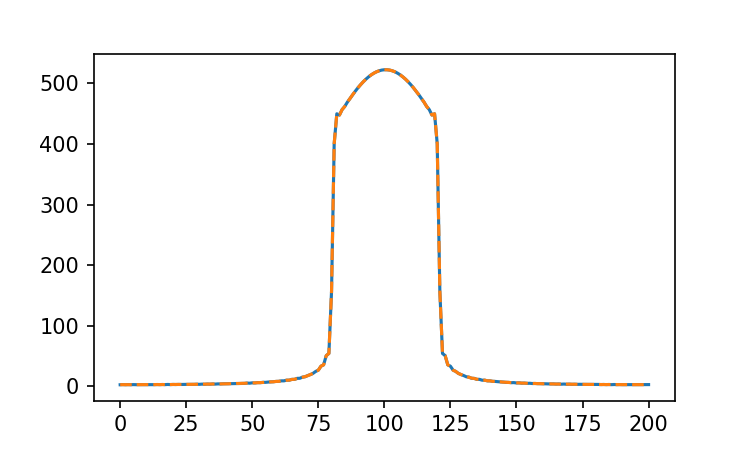

In [16]:
plt.figure(figsize=(5, 3))

# I_rev=np.fft.fft(Ia[150:351])
I_rev2R=np.fft.fft(Ia2[150:351])

# I_revL=np.fft.fft(Ia[150:351])
I_rev2L=np.fft.fft(Ia2L[150:351])

plt.plot(np.abs(I_rev2R))
plt.plot(np.abs(I_rev2L),'--')

## Run 20 IV_Bx

In [20]:
Bx_20=Bx_field
I_20=I
V_20=Keithley1
R_20=R_DC1

<IPython.core.display.Javascript object>


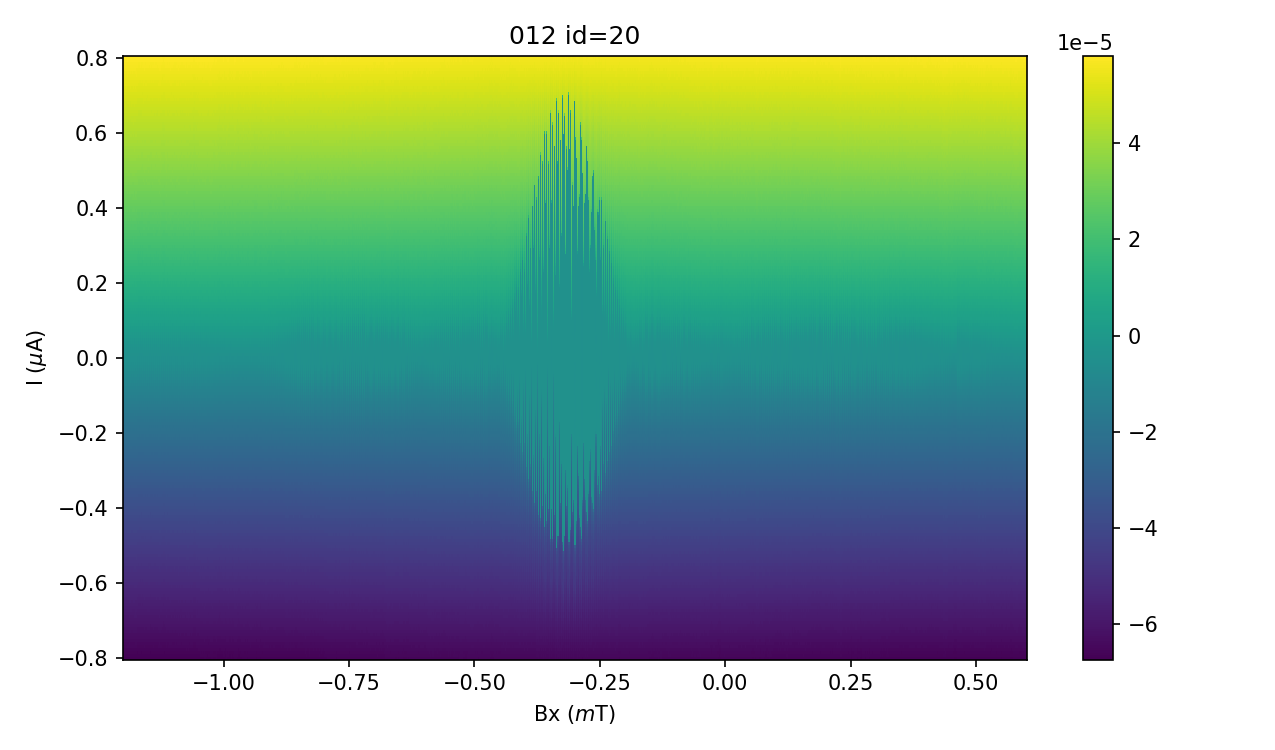

In [21]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(8.5,5))
fig.subplots_adjust(hspace=55)


im = ax0.pcolormesh(Bx_20/1e-3, I_20/1e-6, V_20, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax0)
ax0.set_title('012 id='+str(runid))
ax0.set(xlabel='Bx ($m$T)', ylabel='I ($\mu$A)') 


fig.tight_layout()
#plt.grid()
plt.show()

## Run 22 IV_By

In [26]:
By_22=By_field
I_22=I
V_22=Keithley1
R_22=R_DC1

<IPython.core.display.Javascript object>


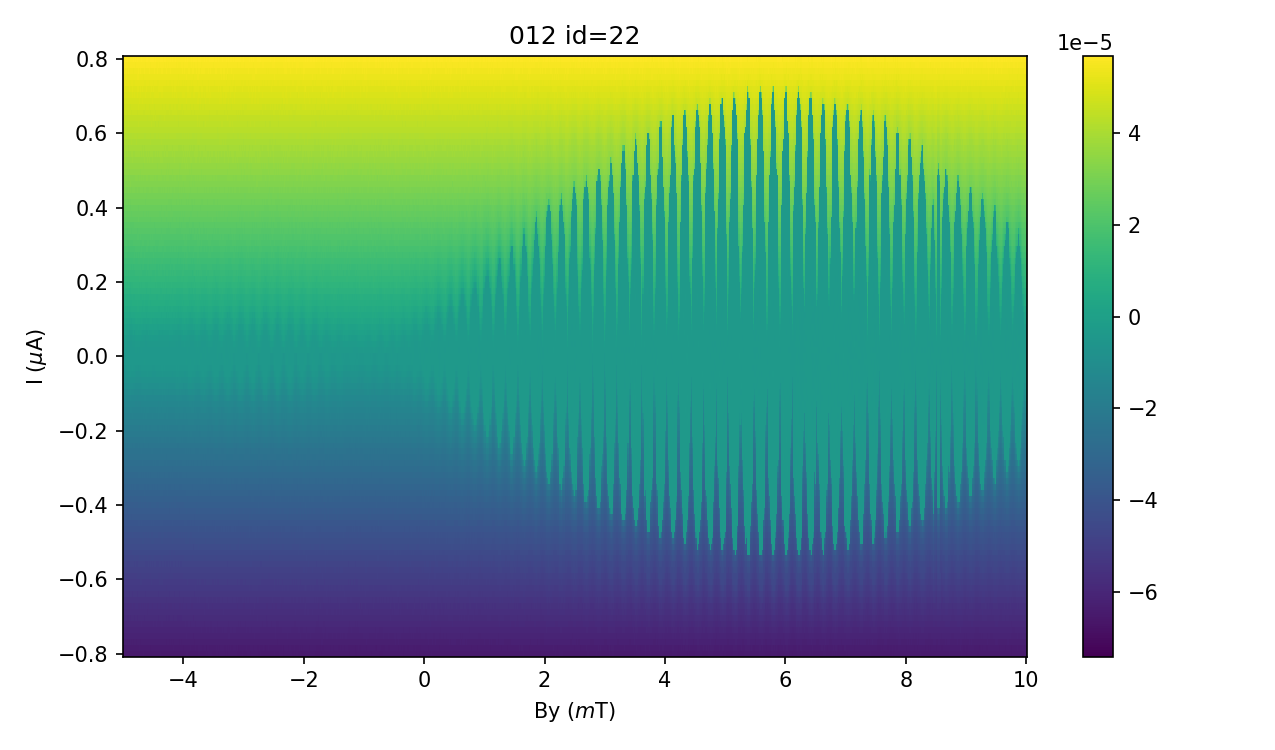

In [48]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(8.5,5))
fig.subplots_adjust(hspace=55)


im = ax0.pcolormesh(By_22/1e-3, I_22/1e-6, V_22, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax0)
ax0.set_title('012 id=22')
ax0.set(xlabel='By ($m$T)', ylabel='I ($\mu$A)') 


fig.tight_layout()
#plt.grid()
plt.show()

## Run 23 IV_By

In [31]:
By_23=By_field
I_23=I
V_23=Keithley1
R_23=R_DC1

In [32]:
## field correction 
Bper_23=(By_23*np.sin(0.01949)-0.1169e-3)

<IPython.core.display.Javascript object>


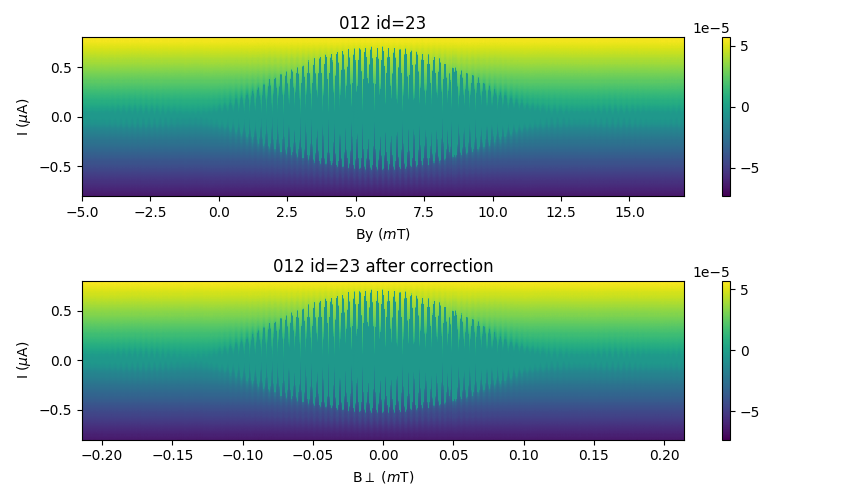

In [37]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(8.5,5))
fig.subplots_adjust(hspace=55)

im = ax0.pcolormesh(By_23/1e-3, I_23/1e-6, V_23, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax0)
ax0.set_title('012 id=23')
ax0.set(xlabel='By ($m$T)', ylabel='I ($\mu$A)') 

im = ax1.pcolormesh((By_23*np.sin(0.01949)-0.1169e-3)/1e-3, I_23/1e-6, V_23, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax1)
ax1.set_title('012 id=23 after correction')
ax1.set(xlabel='B$\perp$ ($m$T)', ylabel='I ($\mu$A)') 

fig.tight_layout()
#plt.grid()
plt.show()

<IPython.core.display.Javascript object>


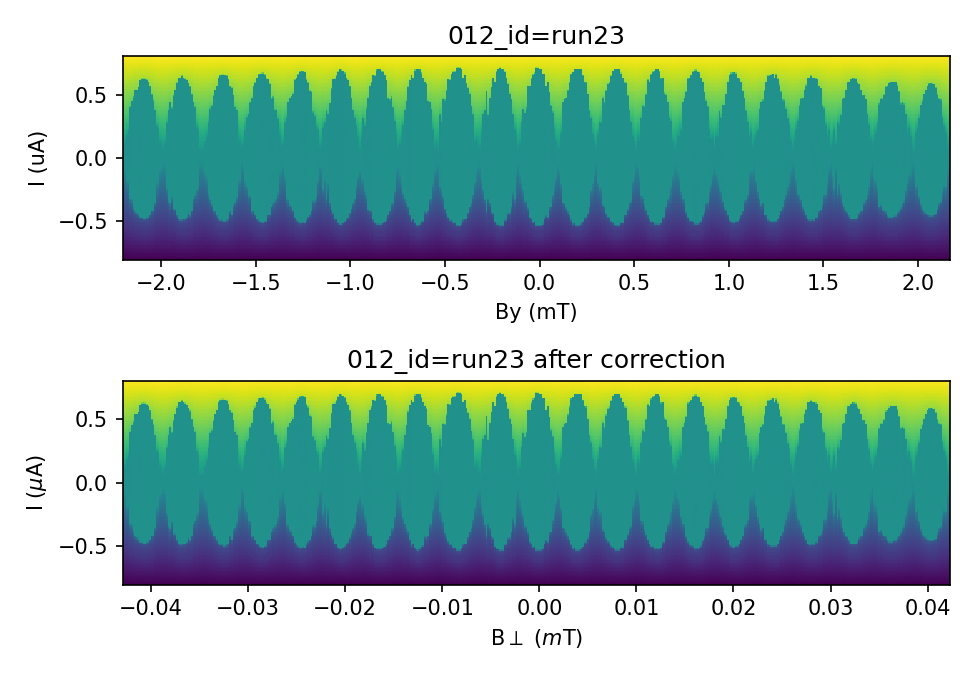

In [68]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
cmap = plt.get_cmap('hot')

Arange=1000
Brange=1497

im = ax0.pcolormesh((By_23[Arange:Brange,:]-6e-3)/1e-3, I_23[Arange:Brange,:]/1e-6, V_23[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
# fig.colorbar(im, ax=ax0)
ax0.set_title('012_id=run23')
ax0.set(xlabel='By (mT)', ylabel='I (uA)') 

im = ax1.pcolormesh((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-3, I_23[Arange:Brange,:]/1e-6, V_23[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
# fig.colorbar(im, ax=ax1)
ax1.set_title('012_id=run23 after correction')
ax1.set(xlabel='B$\perp$ ($m$T)', ylabel='I ($\mu$A)') 


fig.tight_layout()
#plt.grid()
plt.show()

<IPython.core.display.Javascript object>


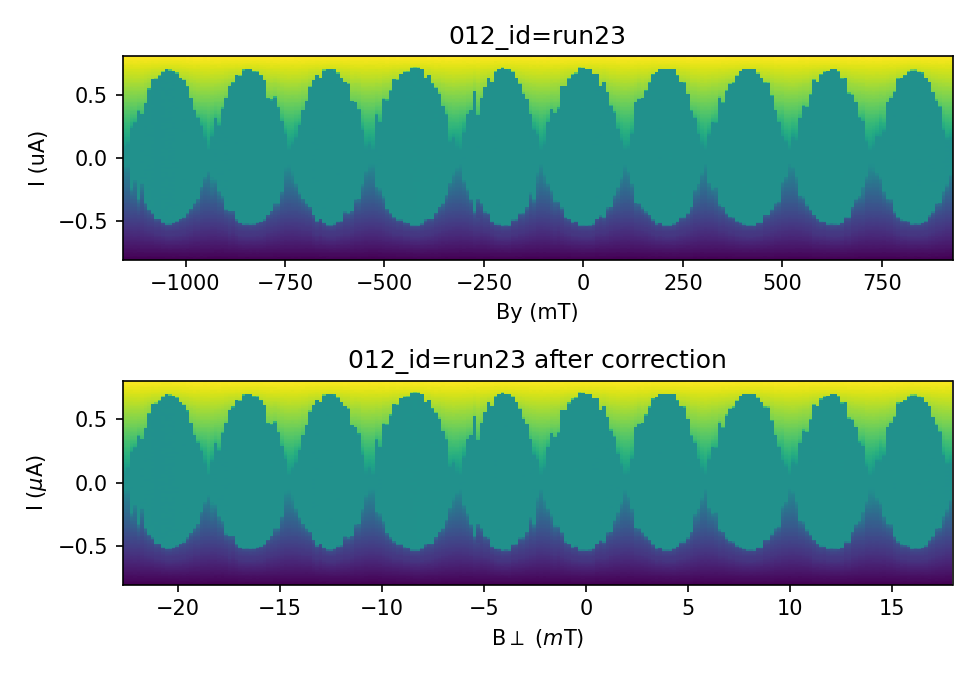

In [69]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
cmap = plt.get_cmap('hot')

Arange=1118
Brange=1355

im = ax0.pcolormesh((By_23[Arange:Brange,:]-5.992e-3)/1e-6, I_23[Arange:Brange,:]/1e-6, V_23[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
# fig.colorbar(im, ax=ax0)
ax0.set_title('012_id=run23')
ax0.set(xlabel='By (mT)', ylabel='I (uA)') 

im = ax1.pcolormesh((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-6, I_23[Arange:Brange,:]/1e-6, V_23[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
# fig.colorbar(im, ax=ax1)
ax1.set_title('012_id=run23 after correction')
ax1.set(xlabel='B$\perp$ ($m$T)', ylabel='I ($\mu$A)') 


fig.tight_layout()
#plt.grid()
plt.show()

In [70]:
((By_23[Arange,0]*np.sin(0.01949)-0.1076e-3)/1e-6)-((By_23[Brange,0]*np.sin(0.01949)-0.1076e-3)/1e-6)

-40.645770601540946

<IPython.core.display.Javascript object>


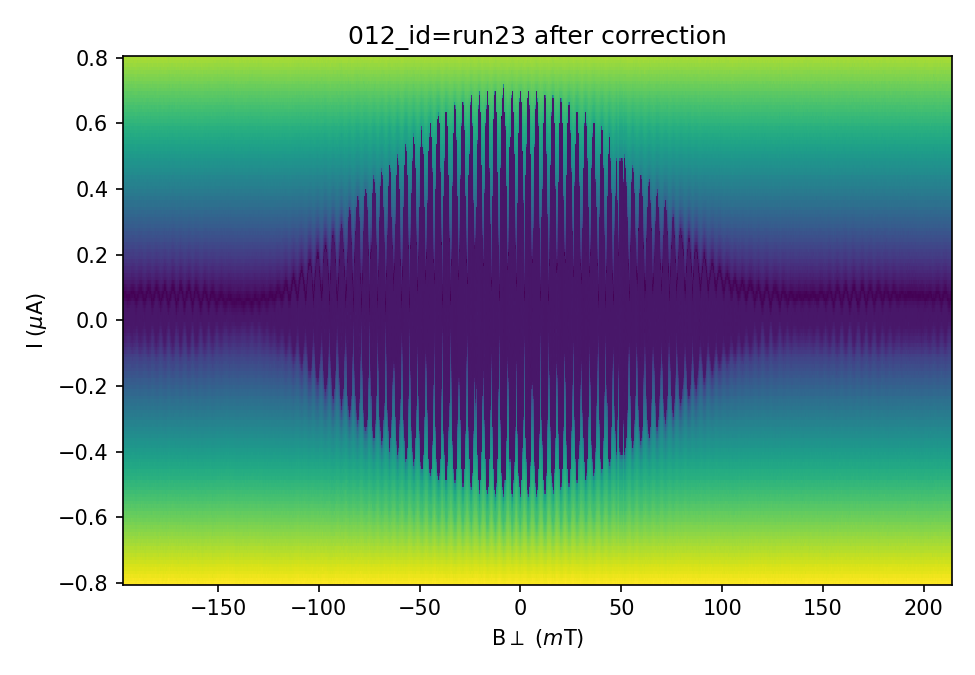

In [71]:
# fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(6.5,4.5))
fig, (ax0) = plt.subplots(nrows=1, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
cmap = plt.get_cmap('hot')

Arange=100
Brange=2500

# im = ax0.pcolormesh((By_23[Arange:Brange,:]-5.992e-3)/1e-6, I_23[Arange:Brange,:]/1e-6, V_23[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# # im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
# # fig.colorbar(im, ax=ax0)
# ax0.set_title('012_id=run23')
# ax0.set(xlabel='By (mT)', ylabel='I (uA)') 

im = ax0.pcolormesh((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-6, I_23[Arange:Brange,:]/1e-6, np.abs(V_23[Arange:Brange,:]/1e-3), cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
# fig.colorbar(im, ax=ax1)
ax0.set_title('012_id=run23 after correction')
ax0.set(xlabel='B$\perp$ ($m$T)', ylabel='I ($\mu$A)') 


fig.tight_layout()
#plt.grid()
plt.show()

### Ic analysis Run23

In [33]:
saiz=np.shape(V_23)
print(saiz)

(2501, 151)


<IPython.core.display.Javascript object>


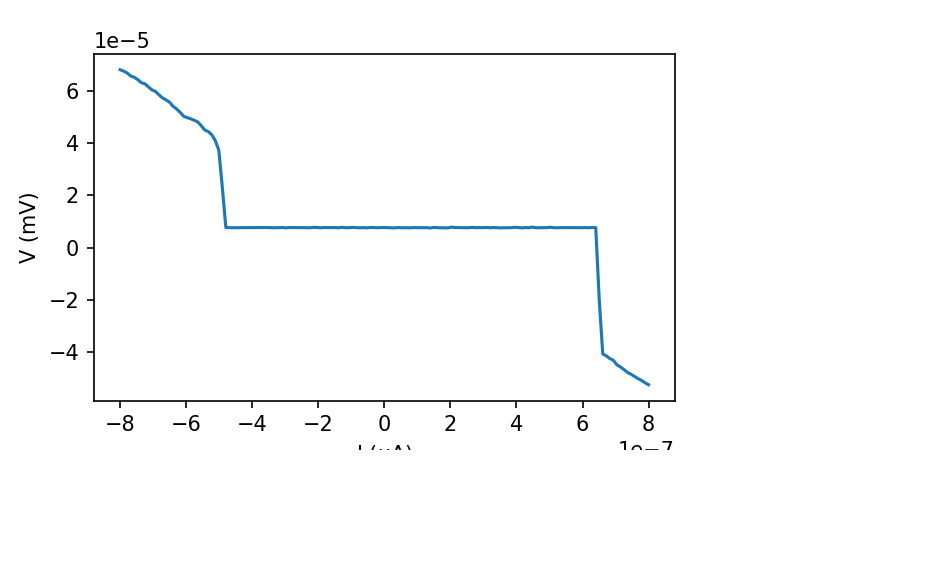

-4.028818e-06


In [10]:
plt.figure(figsize=(5, 3))
# plt.subplot(131)
# plt.plot(I[N,:]/1e-6, Keithley[N,:]/1e-3)
DCoff=np.mean(V_23[1035,70:80])
plt.plot(I_23[1035,:],-V_23[1035,:]-DCoff)
plt.xlabel('I ($\mu$A)')
plt.ylabel('V (mV)')

DCoff=np.mean(V_23[1235,70:80])
print(DCoff)

In [34]:
saiz=np.shape(V_23)
Is_23=np.zeros(saiz[0])
Ir_23=np.zeros(saiz[0])
fV_23=np.zeros((saiz[0],saiz[1]))
saiz=np.shape(V_23)
for i in range(saiz[0]):
    for j in range(1,saiz[1]):
        DCoff=np.mean(V_23[i,70:80])
        if V_23[i,j]-DCoff > 0.8e-6:
            Is_23[i]=I_23[i,j]
            break
    
#     fV_9[i,:]=np.flip(V_9[i,:], 0)
    for j in range(1,saiz[1]):
        DCoff=np.mean(-V_23[i,70:80])
        if -V_23[i,j]-DCoff < 0.8e-6:
            Ir_23[i]=I_23[i,j]
            break

<IPython.core.display.Javascript object>


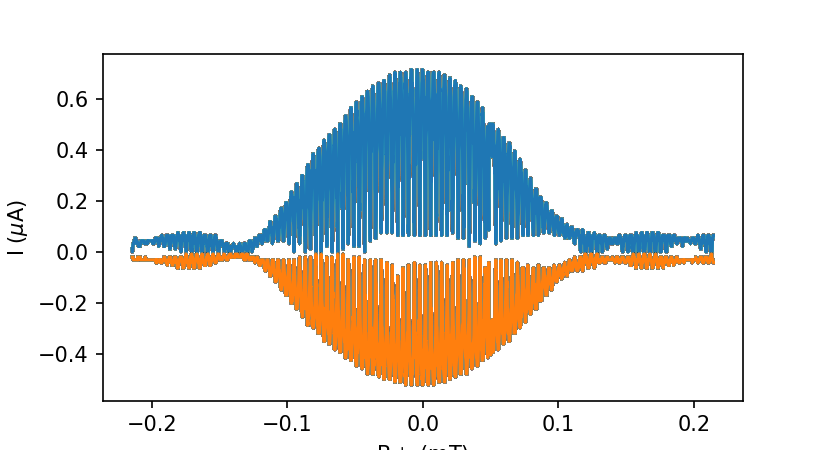

Text(0, 0.5, 'I ($\\mu$A)')

In [35]:
plt.figure(figsize=(5.5, 3))
# plt.subplot(131)
# plt.plot(I[N,:]/1e-6, Keithley[N,:]/1e-3)
# plt.plot(By_9[:,0],Is_9)
# plt.plot(Is_9[Arange:Brange])
# plt.plot(Ir_9[Arange:Brange])
plt.plot(Bper_23/1e-3,Is_23[:]/1e-6)
plt.plot(Bper_23/1e-3,Ir_23[:]/1e-6)
plt.xlabel('B$\perp$ (mT)')
plt.ylabel('I ($\mu$A)')


<IPython.core.display.Javascript object>


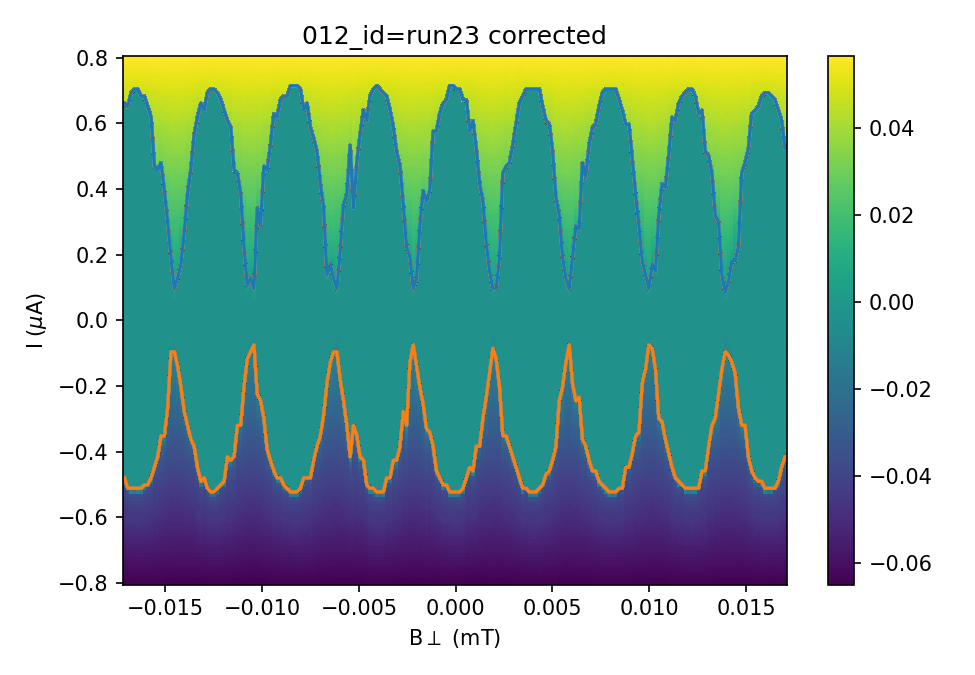

In [73]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
# cmap = plt.get_cmap('hot')

Arange=1150
Brange=1350

im = ax0.pcolormesh((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-3, I_23[Arange:Brange,:]/1e-6, V_23[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
fig.colorbar(im, ax=ax0)
ax0.set_title('012_id=run23 corrected')
ax0.set(xlabel='B$\perp$ (mT)', ylabel='I ($\mu$A)') 

plt.plot((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-3,Is_23[Arange:Brange]/1e-6)
plt.plot((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-3,Ir_23[Arange:Brange]/1e-6)


fig.tight_layout()
#plt.grid()
plt.show()

<IPython.core.display.Javascript object>


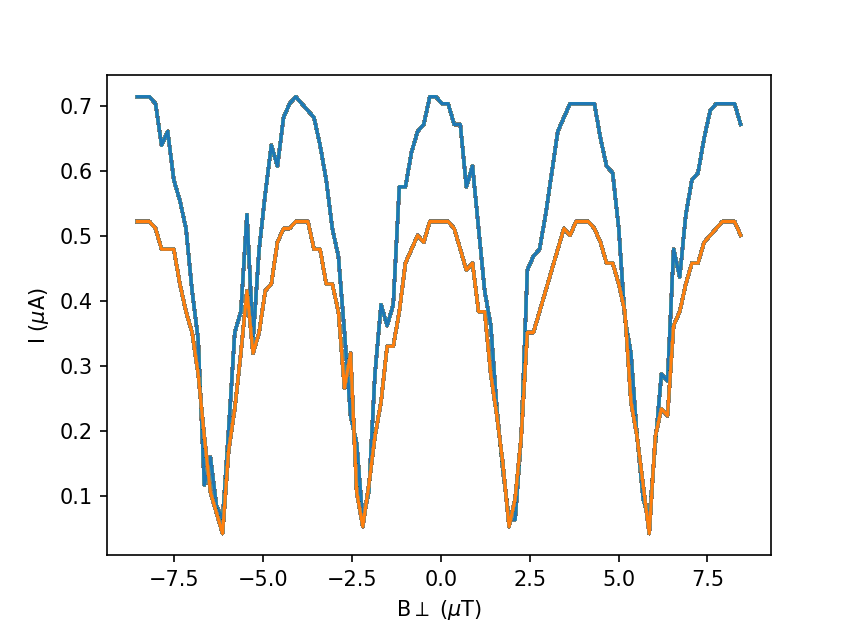

Text(0, 0.5, 'I ($\\mu$A)')

In [23]:
## Find the phase offset
plt.figure(figsize=(5, 3.5))
Arange=1200
Brange=1300
plt.plot((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-6,Is_23[Arange:Brange]/1e-6)
plt.plot((By_23[Arange:Brange,:]*np.sin(0.01949)-0.1169e-3)/1e-6,-Ir_23[Arange:Brange]/1e-6)
# plt.plot(Is_9[:])
# plt.plot(Ir_9[:])
plt.xlabel('B$\perp$ ($\mu$T)')
plt.ylabel('I ($\mu$A)')

In [37]:
np.savez('../dev2_23', I_23, By_23, V_23, R_23, Bper_23, Is_23, Ir_23)

In [38]:
np.savetxt('B_perp_23.csv', (Bper_23), fmt='%s', delimiter=',')
np.savetxt('Is_23.csv', (Is_23), fmt='%s', delimiter=',')
np.savetxt('Ir_23.csv', (Ir_23), fmt='%s', delimiter=',')

## Run 24 IV_Bx

In [11]:
Bx_24=Bx_field
I_24=I
V_24=Keithley1
R_24=R_DC1

<IPython.core.display.Javascript object>


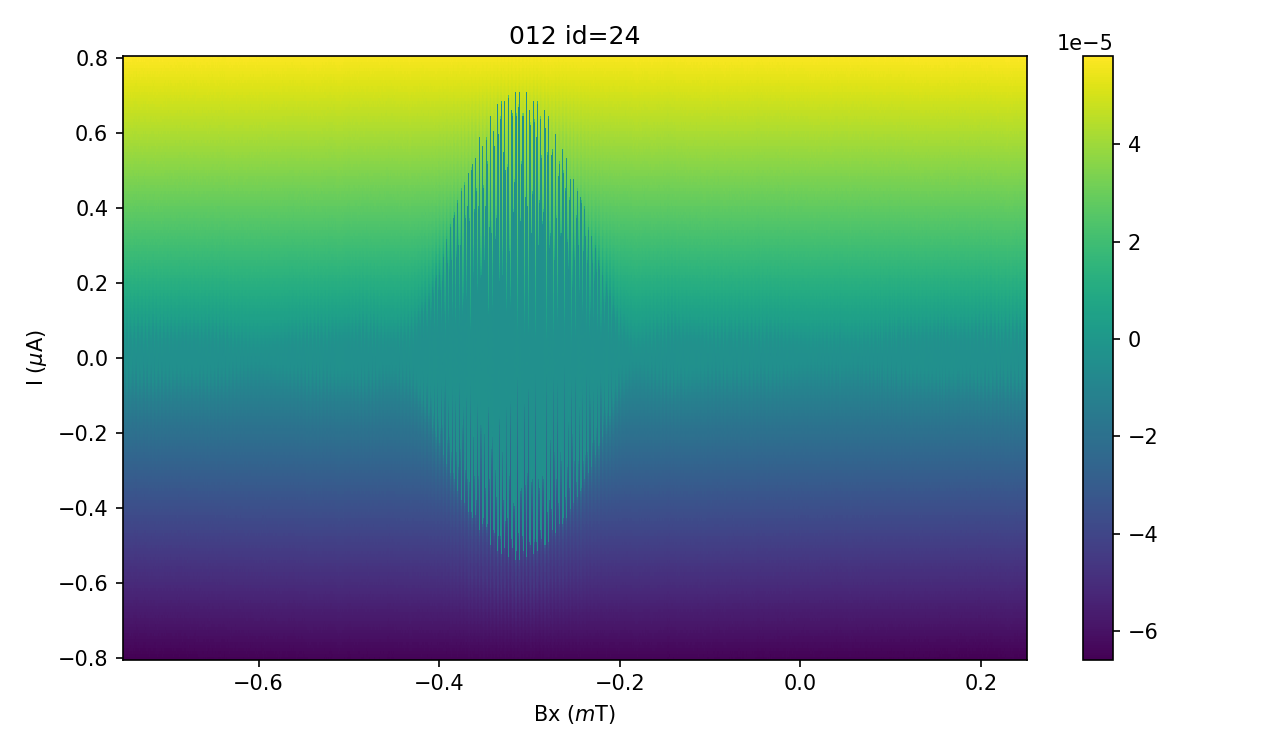

In [59]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(8.5,5))
fig.subplots_adjust(hspace=55)

# im = ax0.pcolormesh(Bx_24[Arange:Brange,:]/1e-3, I_24[Arange:Brange,:]/1e-6, V_24[Arange:Brange,:]/1e-3, cmap = 'viridis')
im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax0)
ax0.set_title('012 id='+str(runid))
ax0.set(xlabel='Bx ($m$T)', ylabel='I ($\mu$A)') 

fig.tight_layout()
#plt.grid()
plt.show()

<IPython.core.display.Javascript object>


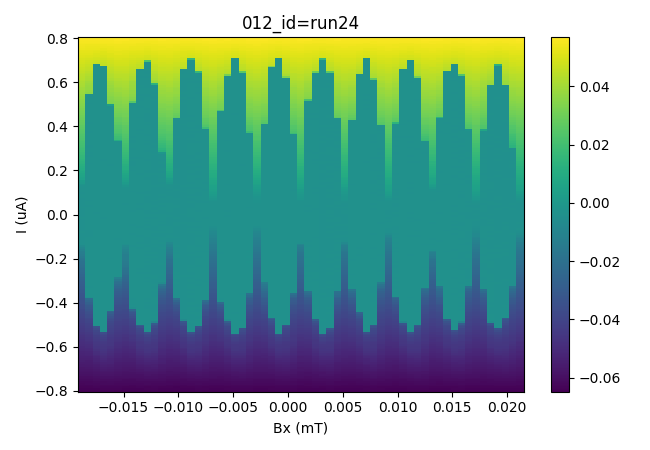

In [12]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
cmap = plt.get_cmap('hot')

Arange=631
Brange=692

im = ax0.pcolormesh((Bx_24[Arange:Brange,:]+0.3105e-3)/1e-3, I_24[Arange:Brange,:]/1e-6, V_24[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
fig.colorbar(im, ax=ax0)
ax0.set_title('012_id=run24')
ax0.set(xlabel='Bx (mT)', ylabel='I (uA)') 


fig.tight_layout()
#plt.grid()
plt.show()

In [13]:
Bx_24[631,0]-Bx_24[692,0]

-4.066666666666601e-05

# Sample 013 dev3

## Run 8 IV_By

In [19]:
By_8=By_field
I_8=I
V_8=Keithley1
R_8=R_DC1

<IPython.core.display.Javascript object>


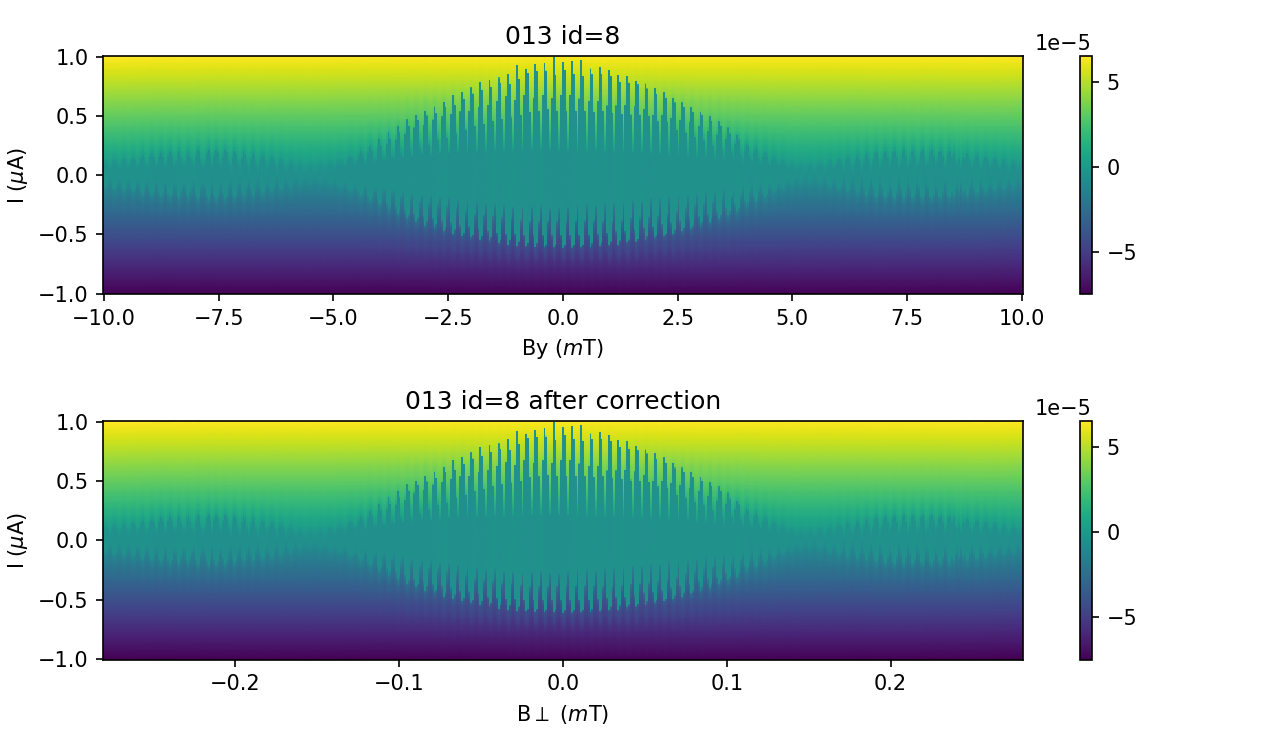

In [23]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(8.5,5))
# fig, (ax0) = plt.subplots(nrows=1, figsize=(8.5,5))
fig.subplots_adjust(hspace=55)

im = ax0.pcolormesh(By_8/1e-3, I_8/1e-6, V_8, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax0)
ax0.set_title('013 id=8')
ax0.set(xlabel='By ($m$T)', ylabel='I ($\mu$A)') 

im = ax1.pcolormesh((By_8*np.sin(0.028))/1e-3, I_8/1e-6, V_8, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax1)
ax1.set_title('013 id=8 after correction')
ax1.set(xlabel='B$\perp$ ($m$T)', ylabel='I ($\mu$A)') 

fig.tight_layout()
#plt.grid()
plt.show()

## Run 9 IV_By

In [11]:
By_9=By_field
I_9=I
V_9=Keithley1
R_9=R_DC1

<IPython.core.display.Javascript object>


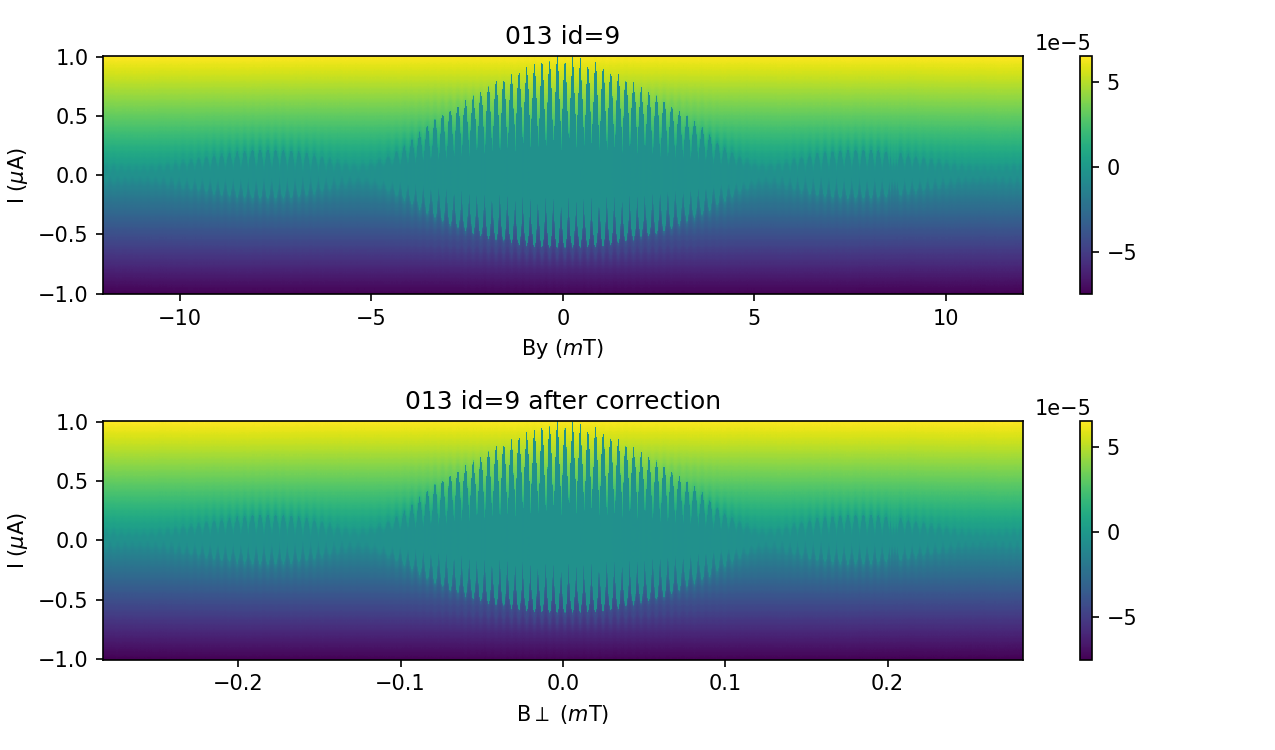

In [12]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(8.5,5))
# fig, (ax0) = plt.subplots(nrows=1, figsize=(8.5,5))
fig.subplots_adjust(hspace=55)

im = ax0.pcolormesh(By_9/1e-3, I_9/1e-6, V_9, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax0)
ax0.set_title('013 id=9')
ax0.set(xlabel='By ($m$T)', ylabel='I ($\mu$A)') 

im = ax1.pcolormesh((By_9*np.sin(0.023595))/1e-3, I_9/1e-6, V_9, cmap = 'viridis')#, vmin=0, vmax=200)
fig.colorbar(im, ax=ax1)
ax1.set_title('013 id=9 after correction')
ax1.set(xlabel='B$\perp$ ($m$T)', ylabel='I ($\mu$A)') 

fig.tight_layout()
#plt.grid()
plt.show()

<IPython.core.display.Javascript object>


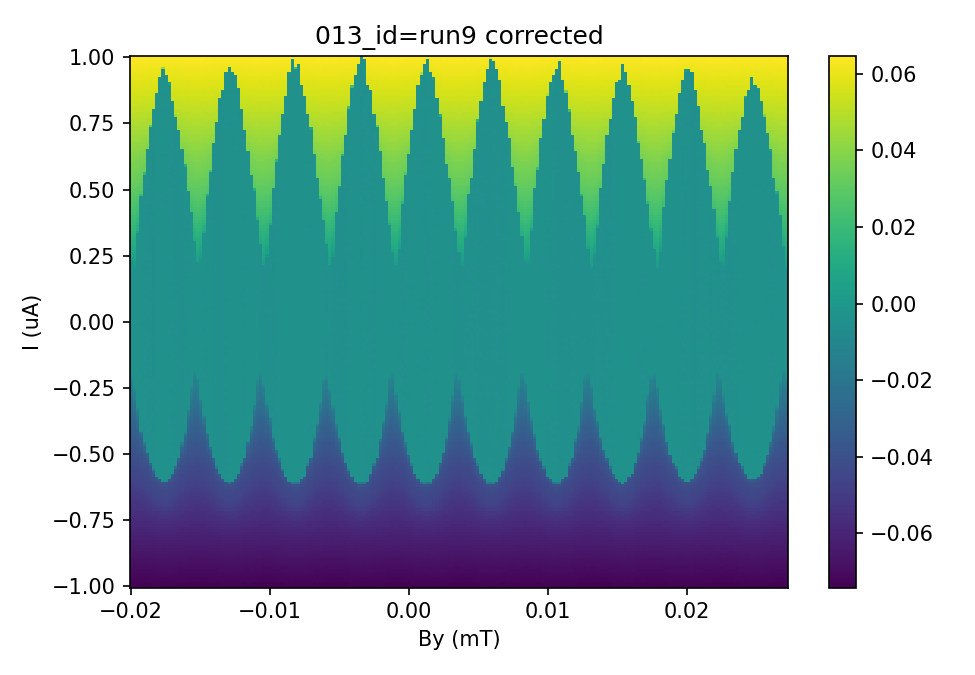

In [13]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
cmap = plt.get_cmap('hot')

Arange=1162
Brange=1371

im = ax0.pcolormesh((By_9[Arange:Brange,:]*np.sin(0.023595))/1e-3, I_9[Arange:Brange,:]/1e-6, V_9[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
fig.colorbar(im, ax=ax0)
ax0.set_title('013_id=run9 corrected')
ax0.set(xlabel='By (mT)', ylabel='I (uA)') 


fig.tight_layout()
#plt.grid()
plt.show()

In [51]:
(By_9[Arange,0]*np.sin(0.023595))-(By_9[Brange,0]*np.sin(0.023595))

-4.73366154761861e-05

<IPython.core.display.Javascript object>


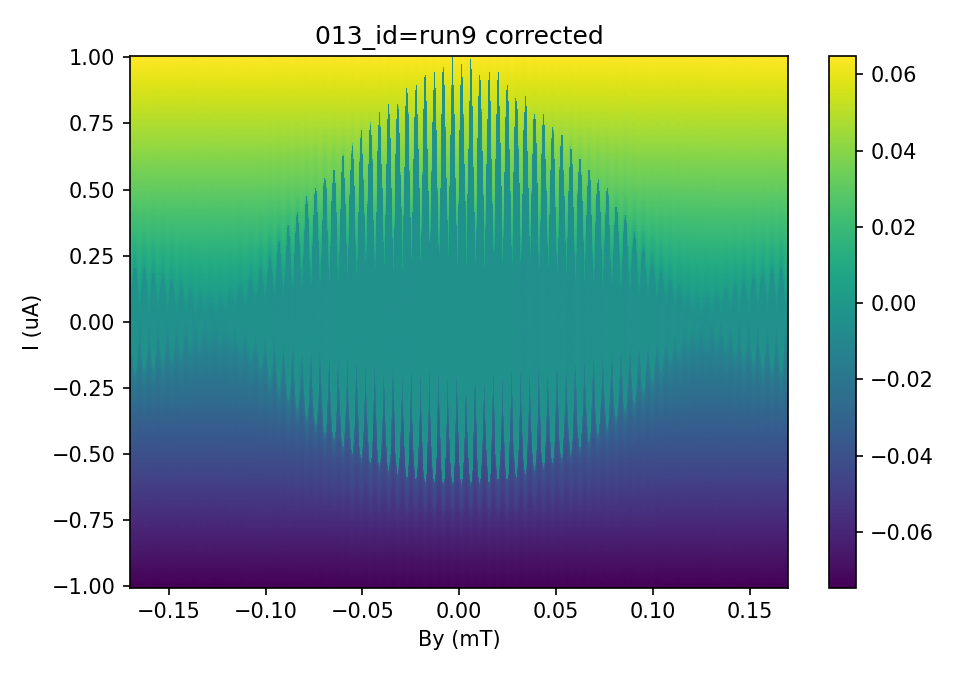

In [14]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
cmap = plt.get_cmap('hot')

Arange=500
Brange=2000

im = ax0.pcolormesh((By_9[Arange:Brange,:]*np.sin(0.023595))/1e-3, I_9[Arange:Brange,:]/1e-6, V_9[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
fig.colorbar(im, ax=ax0)
ax0.set_title('013_id=run9 corrected')
ax0.set(xlabel='By (mT)', ylabel='I (uA)') 


fig.tight_layout()
#plt.grid()
plt.show()

### Ic analysis run9

In [15]:
saiz=np.shape(V_9)
print(saiz)

(2501, 201)


<IPython.core.display.Javascript object>


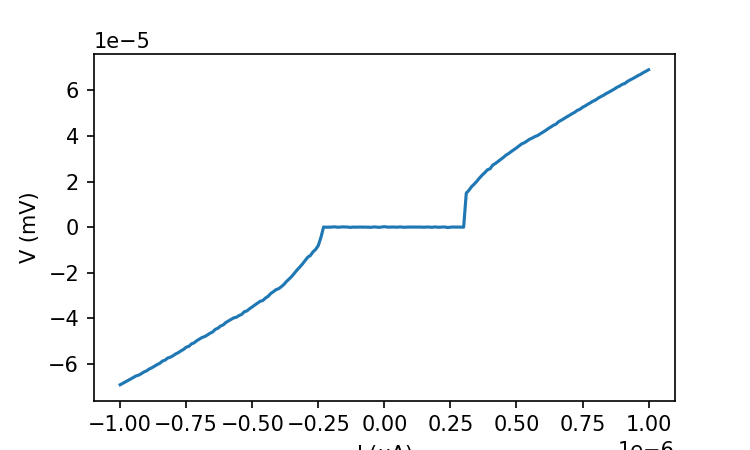

-4.7140888999999994e-06


In [21]:
plt.figure(figsize=(5, 3))
# plt.subplot(131)
# plt.plot(I[N,:]/1e-6, Keithley[N,:]/1e-3)
DCoff=np.mean(V_9[1035,95:105])
plt.plot(I_9[1035,:],V_9[1035,:]-DCoff)
plt.xlabel('I ($\mu$A)')
plt.ylabel('V (mV)')

DCoff=np.mean(V_9[1035,95:105])
print(DCoff)

In [22]:
Is_9=np.zeros(saiz[0])
Ir_9=np.zeros(saiz[0])
fV_9=np.zeros((saiz[0],saiz[1]))
saiz=np.shape(V_9)
for i in range(saiz[0]):
    for j in range(1,saiz[1]):
        DCoff=np.mean(V_9[i,95:105])
        if V_9[i,j]-DCoff > 0.5e-5:
            Is_9[i]=I_9[i,j]
            break
    
#     fV_9[i,:]=np.flip(V_9[i,:], 0)
    for j in range(1,saiz[1]):
        DCoff=np.mean(-V_9[i,95:105])
        if -V_9[i,j]-DCoff < 0.5e-5:
            Ir_9[i]=I_9[i,j]
            break

<IPython.core.display.Javascript object>


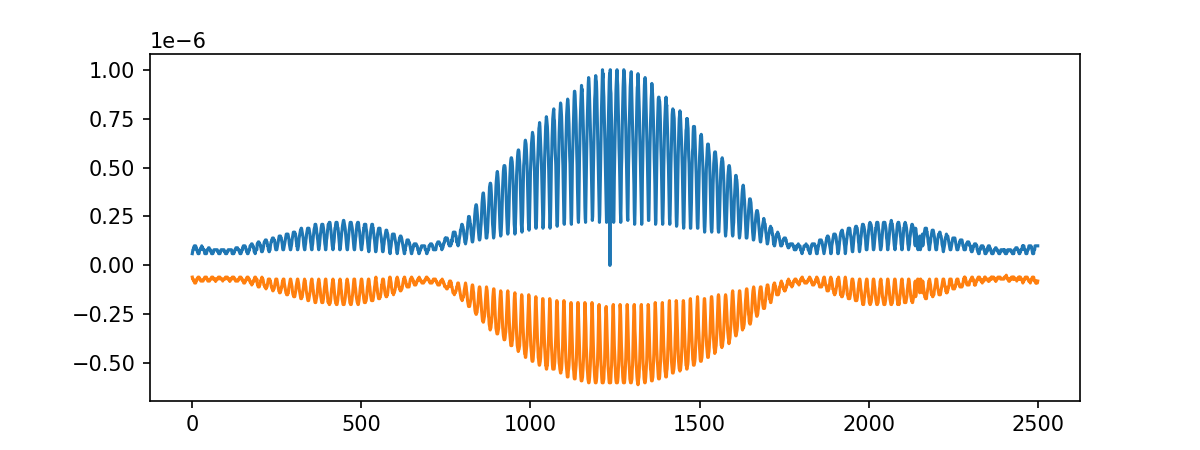

In [23]:
plt.figure(figsize=(8, 3))
# plt.subplot(131)
# plt.plot(I[N,:]/1e-6, Keithley[N,:]/1e-3)
# plt.plot(By_9[:,0],Is_9)
# plt.plot(Is_9[Arange:Brange])
# plt.plot(Ir_9[Arange:Brange])
plt.plot(Is_9[:])
plt.plot(Ir_9[:])
# plt.xlabel('By (mT)')
# plt.ylabel('V (mV)')


<IPython.core.display.Javascript object>


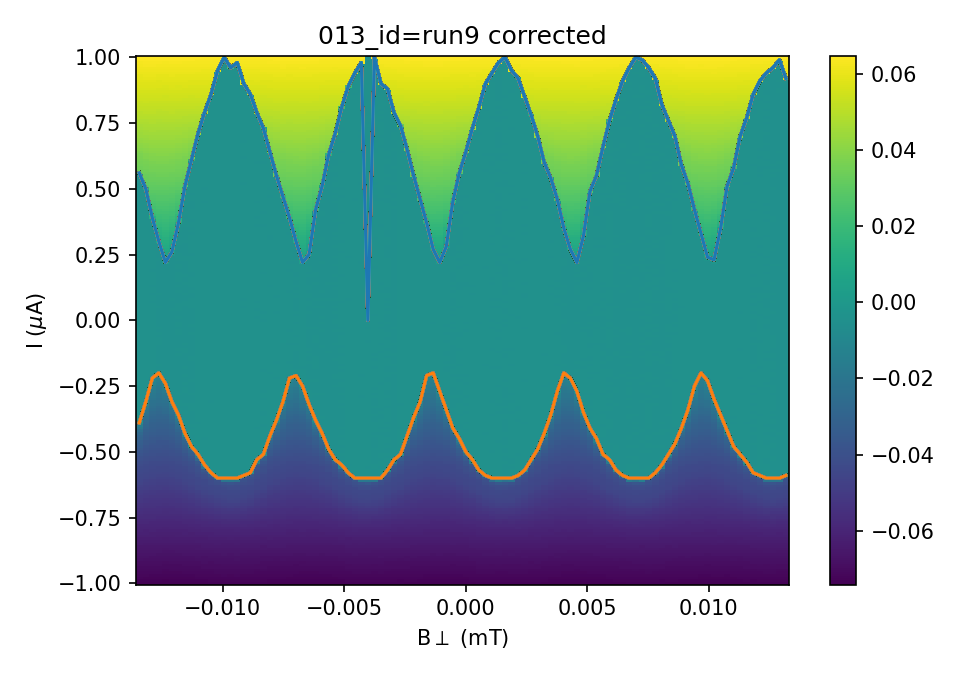

In [24]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(6.5,4.5))
fig.subplots_adjust(hspace=55)
# cmap = plt.get_cmap('hot')

Arange=1200
Brange=1300

im = ax0.pcolormesh((By_9[Arange:Brange,:]*np.sin(0.028))/1e-3, I_9[Arange:Brange,:]/1e-6, V_9[Arange:Brange,:]/1e-3, cmap = 'viridis')#, vmax=100,vmin=0)
# im = ax0.pcolormesh(Bx_24/1e-3, I_24/1e-6, V_24/1e-3, cmap = 'viridis')#, vmax=1
fig.colorbar(im, ax=ax0)
ax0.set_title('013_id=run9 corrected')
ax0.set(xlabel='B$\perp$ (mT)', ylabel='I ($\mu$A)') 

plt.plot((By_9[Arange:Brange,:]*np.sin(0.028))/1e-3,Is_9[Arange:Brange]/1e-6)
plt.plot((By_9[Arange:Brange,:]*np.sin(0.028))/1e-3,Ir_9[Arange:Brange]/1e-6)


fig.tight_layout()
#plt.grid()
plt.show()

<IPython.core.display.Javascript object>


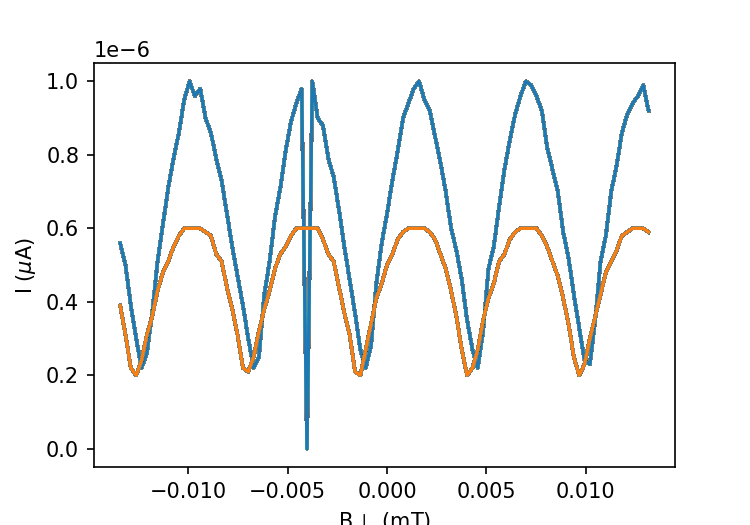

Text(0, 0.5, 'I ($\\mu$A)')

In [25]:
## Find the phase offset
plt.figure(figsize=(5, 3.5))
Arange=1200
Brange=1300
plt.plot((By_9[Arange:Brange,:]*np.sin(0.028))/1e-3,Is_9[Arange:Brange])
plt.plot((By_9[Arange:Brange,:]*np.sin(0.028))/1e-3,-Ir_9[Arange:Brange])
# plt.plot(Is_9[:])
# plt.plot(Ir_9[:])
plt.xlabel('B$\perp$ (mT)')
plt.ylabel('I ($\mu$A)')


In [27]:
np.savetxt('By_9.csv', (By_9*np.sin(0.028)), fmt='%s', delimiter=',')
np.savetxt('Is_9.csv', (Is_9), fmt='%s', delimiter=',')
np.savetxt('Ir_9.csv', (Ir_9), fmt='%s', delimiter=',')

# fitting to Ic value

In [80]:
# Ref : https://iopscience.iop.org/article/10.1088/0031-8949/2015/T164/014002/pdf

B=(np.linspace(0,10,2501)-5)
# A=(np.linspace(0,2000,5001)-1000)
I1_0=1
I2_0=1

I_test=np.abs((I1_0*np.sin(B)/B-I2_0*np.sin(B)/B)**2+4*(((I1_0*np.sin(B)/B)*(I2_0*np.sin(B)/B))*np.cos(50*B)))**0.5
# I=np.abs((I1_0*np.sin(B)/B-I2_0*np.sin(B)/B)**2+4*(((I1_0*np.sin(B)/B)*(I2_0*np.sin(B)/B))*np.cos(50*B)))**0.5

C:\Users\chung\AppData\Local\Temp/ipykernel_19972/2116064988.py:8: RuntimeWarning: invalid value encountered in true_divide
  I_test=np.abs((I1_0*np.sin(B)/B-I2_0*np.sin(B)/B)**2+4*(((I1_0*np.sin(B)/B)*(I2_0*np.sin(B)/B))*np.cos(50*B)))**0.5


<IPython.core.display.Javascript object>


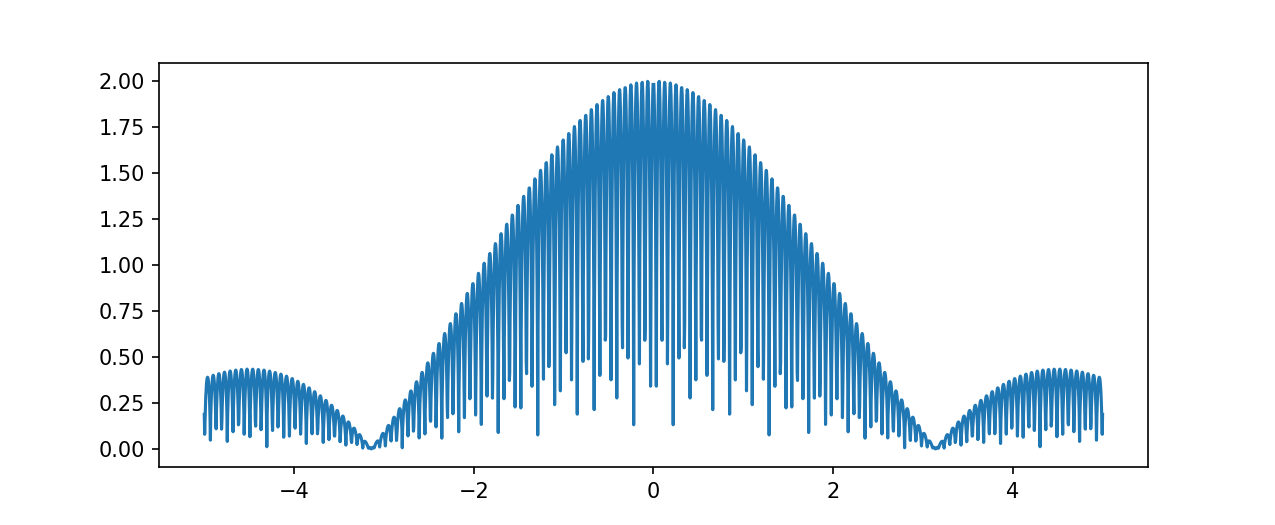

In [39]:
## Find the phase offset
plt.figure(figsize=(8.5, 3.5))

plt.plot(B,I_test)
# plt.xlabel('B$\perp$ (mT)')
# plt.ylabel('I (uA)')

In [25]:
print(I)

[0.18829652 0.14513759 0.08003848 ... 0.08003848 0.14513759 0.18829652]


In [59]:
# Ref : https://iopscience.iop.org/article/10.1088/0031-8949/2015/T164/014002/pdf

B=(np.linspace(0,4,2501)-2)
# A=(np.linspace(0,2000,5001)-1000)
I1_0=1e-6
I2_0=0.1e-6

I=np.abs((I1_0*np.sin(B)/B-I2_0*np.sin(B)/B)**2+4*(((I1_0*np.sin(B)/B)*(I2_0*np.sin(B)/B))*np.cos(50*B)))**0.5

C:\Users\chung\AppData\Local\Temp/ipykernel_4692/1800496320.py:8: RuntimeWarning: invalid value encountered in true_divide
  I=np.abs((I1_0*np.sin(B)/B-I2_0*np.sin(B)/B)**2+4*(((I1_0*np.sin(B)/B)*(I2_0*np.sin(B)/B))*np.cos(50*B)))**0.5


<IPython.core.display.Javascript object>


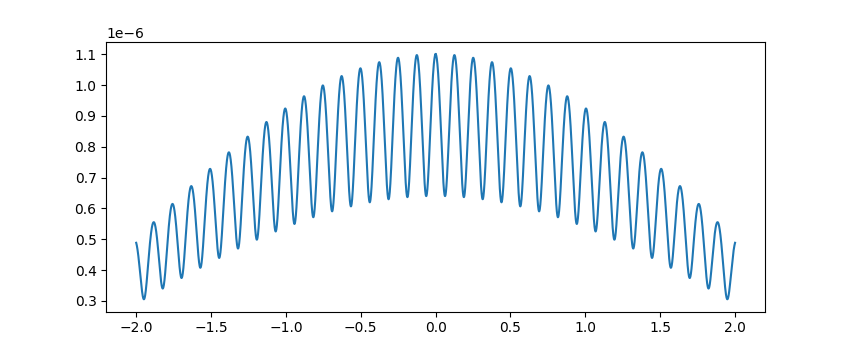

In [60]:
## Find the phase offset
plt.figure(figsize=(8.5, 3.5))

plt.plot(B,I)
# plt.xlabel('B$\perp$ (mT)')
# plt.ylabel('I (uA)')


In [ ]:
# For Dev 2(012) fraunhofer period 201.25 uT and SQUID is 6.06 uT
# so the ratio of period should be 201.25/6.06~33.21

In [119]:
# I=np.abs((I1_0*np.sin(B)/B-I2_0*np.sin(B)/B)**2+4*((I1_0*np.sin(B)/B*I2_0*np.sin(B)/B)*np.cos(50*B)))**0.5
def fun(x, a, b, c, d):
    return np.abs((a*np.sin(c*x)/c*x-b*np.sin(c*x)/c*x)**2+4*(((a*np.sin(c*x)/c*x)*(b*np.sin(c*x)/c*x))*np.cos(50*x)))**0.5+d


def func(x, a, b, d):
#     return np.abs((a*np.abs(np.sin(x)/x)-b*np.abs(np.sin(x)/x))**2+4*(((a*np.abs(np.sin(x)/x))*(b*np.abs(np.sin(x)/x))*np.cos(x*33.4))))**0.5+d
    return np.abs(((a*np.sin(x)/x)-b*(np.sin(x)/x))**2+4*(((a*(np.sin(x)/x))*(b*(np.sin(x)/x))*np.cos(x*33.4))))**0.5+d

def func2(x, a, d):
    return np.abs((a*np.abs(np.sin(x)/x)-(((Imax/2)**2)/a)*np.abs(np.sin(x)/x))**2+\
                  4*(((a*np.abs(np.sin(x)/x))*((((Imax/2)**2)/a)*np.abs(np.sin(x)/x))*np.cos(x*33.4))))**0.5+d

In [116]:
Imax=max(ydata)
print(Imax)

0.7146666666666671


<IPython.core.display.Javascript object>


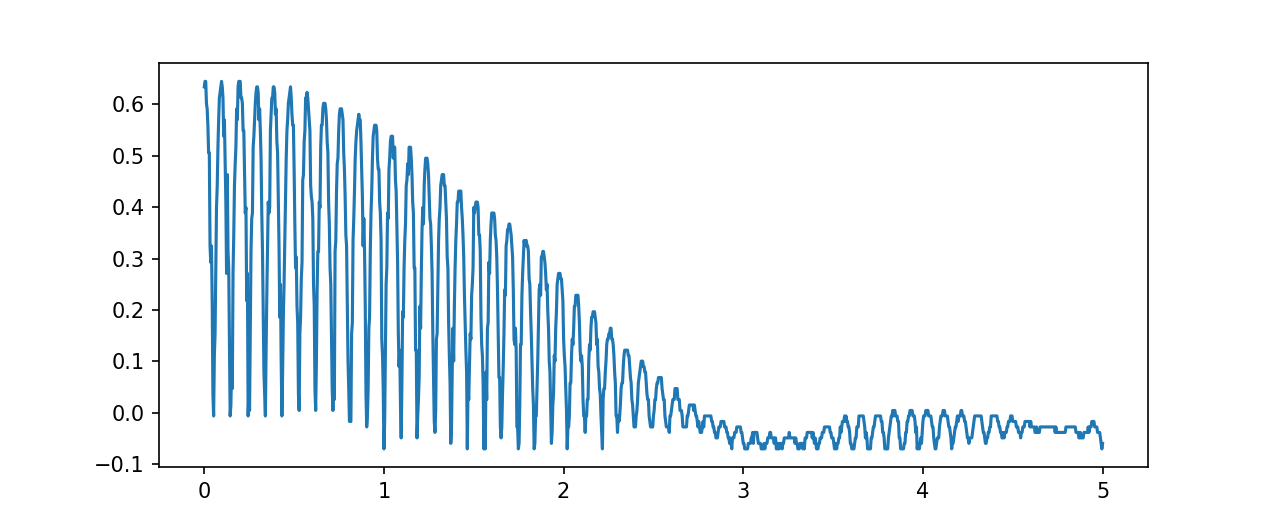

In [110]:
plt.figure(figsize=(8.5, 3.5))
B=(np.linspace(0,10,2501)-5)
# plt.plot(-(By_23[0:1251,0]-0.00582)/1e-3,(Is_23[0:1251]-7e-8)/1e-6)
plt.plot(-B[0:1251],(Is_23[0:1251]-7e-8)/1e-6)

In [138]:
B=(np.linspace(0,10,2501)-5)
xdata=-B[900:1250]
ydata=(Is_23[900:1250])/1e-6
Imax=max(ydata)
# xdata=B[2501:5001]
# ydata=I_test[2501:5001]

poptc,pcovc= optimize.curve_fit(func,xdata,ydata, bounds=((0.36,0.36,-np.inf), (np.inf,np.inf,np.inf)))
# printopt (pcovc)
print(poptc)

[ 0.36        0.36       -0.05633158]


<IPython.core.display.Javascript object>


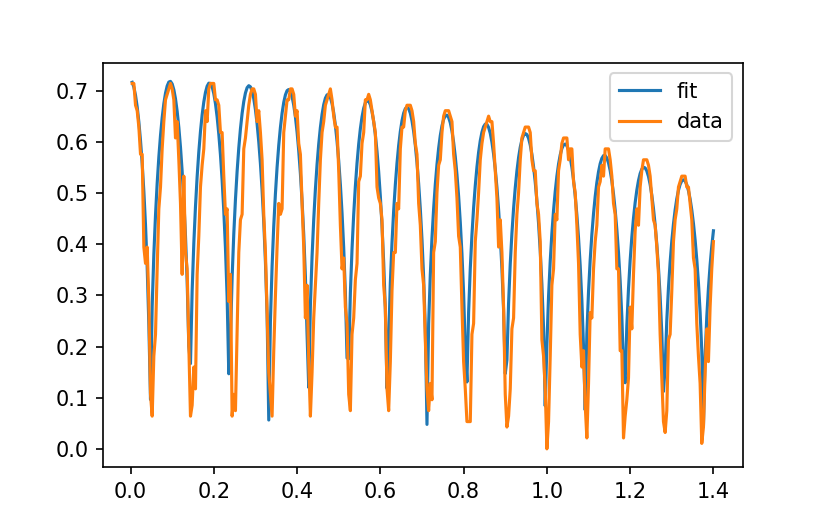

In [142]:
# Ref : https://iopscience.iop.org/article/10.1088/0031-8949/2015/T164/014002/pdf

# B=(np.linspace(0.1,5,450))
B=xdata
# A=(np.linspace(0,2000,5001)-1000)
I1_0=poptc[0]
I2_0=poptc[1]


# I=np.abs(((I1_0*np.sin(popt[2]*B)/popt[2]*B)-(I2_0*np.sin(popt[2]*B)/popt[2]*B))**2+4*(((I1_0*np.sin(popt[2]*B)/popt[2]*B)*(I2_0*np.sin(popt[2]*B)/(popt[2]*B)))*np.cos(popt[3]*B)))**0.5

I2=np.abs(((I1_0*np.sin(B)/B)-(I2_0*np.sin(B)/B))**2+\
          4*(((I1_0*np.sin(B)/B)*(I2_0*np.sin(B)/B))*np.cos(B*33.1)))**0.5

plt.figure(figsize=(5.5, 3.5))

plt.plot(B,I2)
plt.plot(xdata, ydata)
plt.legend(['fit','data'])
# plt.plot(Bper_23/1e-3,Is_23/1e-6)